### Note: The dataset used in this analysis is the Uber/Lyft Boston Dataset (690k records). For reproducibility, please download the rideshare_kaggle.csv from Kaggle and place it in the root directory.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats 
from scipy.stats import boxcox, mannwhitneyu, f_oneway, shapiro, normaltest, probplot
import itertools
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE

In [42]:
df = pd.read_csv("rideshare_kaggle.csv")

In [43]:
df.describe()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
count,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,8.467970,45.040982,34.150736,41.614054,30.139824,31.656256,1010.094766,220.055853,0.686502,0.248908,313.513635,0.579066,33.457774,45.261313,29.731002,41.997343
std,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,2.602888,5.996541,6.383163,7.666138,8.057468,9.142355,13.472899,99.102736,0.358534,0.474097,27.953061,0.244705,6.467224,5.645046,7.110494,6.936841
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,0.717000,32.680000,17.850000,22.620000,11.810000,4.390000,988.090000,2.000000,0.000000,0.000000,269.400000,0.090000,15.630000,33.510000,11.810000,28.950000
25%,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,8.432000,42.570000,30.170000,36.570000,27.700000,27.490000,999.820000,124.000000,0.370000,0.000000,290.900000,0.300000,30.170000,42.570000,27.760000,36.570000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,9.880000,44.680000,34.180000,40.950000,30.030000,30.690000,1009.250000,258.000000,0.820000,0.000000,307.400000,0.680000,34.240000,44.680000,30.130000,40.950000
75%,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,9.996000,46.910000,38.730000,44.120000,35.320000,38.120000,1021.860000,303.000000,1.000000,0.000000,331.800000,0.790000,38.880000,46.910000,35.710000,44.120000
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,57.220000,0.144700,1.000000,0.960000,15.000000,27.250000,10.000000,57.870000,46.600000,57.200000,47.250000,50.670000,1035.550000,356.000000,1.000000,2.000000,378.900000,0.930000,43.100000,57.870000,40.050000,57.200000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       693071 non-null  object 
 1   hour                     693071 non-null  int64  
 2   day                      693071 non-null  int64  
 3   month                    693071 non-null  int64  
 4   source                   693071 non-null  object 
 5   destination              693071 non-null  object 
 6   cab_type                 693071 non-null  object 
 7   product_id               693071 non-null  object 
 8   name                     693071 non-null  object 
 9   price                    637976 non-null  float64
 10  distance                 693071 non-null  float64
 11  surge_multiplier         693071 non-null  float64
 12  latitude                 693071 non-null  float64
 13  longitude                693071 non-null  float64
 14  temp

In [45]:
df.head(15)

,id,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,32.70,1021.98,57,0.72,0,303.8,0.30,39.89,43.68,33.73,38.07
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,41.83,1003.97,90,1.00,0,291.1,0.64,40.49,47.30,36.20,43.92
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,31.10,992.28,240,0.03,0,315.7,0.68,35.36,47.55,31.04,44.12
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,26.64,1013.73,310,0.00,0,291.1,0.75,34.67,45.03,30.30,38.53
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,28.61,998.36,303,0.44,0,347.7,0.72,33.10,42.18,29.11,35.75
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,18,17,12,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.0330,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,8.325,40.61,24.07,34.97,12.04,34.41,1000.46,294,1.00,1,335.8,0.33,34.19,40.66,27.39,34.97
6,462816a3-820d-408b-8549-0b39e82f65ac,5,26,11,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,42.3503,-71.0810,41.99,41.99,Overcast,"Rain until morning, starting again in the eve...",0.0000,0.0,0.91,0.53,0.88,4.675,46.46,42.17,43.81,37.08,39.54,1014.11,91,1.00,0,312.3,0.64,40.67,46.46,37.45,43.81
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,19,2,12,Back Bay,Northeastern University,Lyft,lyft_lux,Lux Black,16.5,1.08,1.0,42.3503,-71.0810,49.88,49.22,Light Rain,Light rain until evening.,0.0246,1.0,0.93,3.38,3.38,3.052,50.80,44.97,50.13,45.62,48.02,1004.33,159,1.00,0,282.5,0.86,36.32,50.80,35.84,50.13
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,6,3,12,Back Bay,Northeastern University,Lyft,lyft_line,Shared,3.0,1.08,1.0,42.3503,-71.0810,45.58,45.58,Foggy,Foggy in the morning.,0.0000,0.0,0.96,1.25,2.09,1.413,57.02,33.74,56.35,28.53,44.50,1001.06,307,1.00,0,290.9,0.89,43.09,57.02,39.90,56.35
9,8612d909-98b8-4454-a093-30bd48de0cb3,10,27,11,Back Bay,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,27.5,1.08,1.0,42.3503,-71.0810,45.45,41.77,Light Rain,Light rain in the morning.,0.0624,1.0,0.93,6.87,7.42,2.686,46.91,33.82,44.01,30.19,43.52,989.98,79,1.00,0,296.2,0.68,36.34,46.91,32.43,44.01


In [46]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

unique_sources = df['source'].unique()
unique_destinations = df['destination'].unique()

route_counts = df.groupby(['source', 'destination']).size().reset_index(name='count')
top_routes = route_counts.sort_values(by='count', ascending=False)

source_set = set(unique_sources)
destination_set = set(unique_destinations)

outgoing_only = source_set - destination_set

print("Unique Sources:")
print(unique_sources)
print("\nUnique Destinations:")
print(unique_destinations)

print("\nTop 5 Routes by Trip Count:")
print(top_routes.head(5))

print("\nLocations with outgoing trips but no incoming trips:")
if outgoing_only:
    print(outgoing_only)
else:
    print("None. All sources also appear as destinations.")

Unique Sources:
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

Unique Destinations:
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

Top 5 Routes by Trip Count:
                source         destination  count
29  Financial District       South Station  10352
56       South Station  Financial District  10352
3             Back Bay           North End  10225
36           North End            Back Bay  10225
23              Fenway            West End  10165

Locations with outgoing trips but no incoming trips:
None. All sources also appear as destinations.


In [47]:
unique_product_ids = df['product_id'].nunique()
unique_names = df['name'].nunique()

unique_combinations = df[['product_id', 'name']].drop_duplicates()

print(f"Number of unique product_ids: {unique_product_ids}")
print(f"Number of unique names: {unique_names}")
print(f"Number of unique combinations: {len(unique_combinations)}")

print("\nMapping between product_id and name:")
print(unique_combinations.sort_values('name'))

Number of unique product_ids: 13
Number of unique names: 13
Number of unique combinations: 13

Mapping between product_id and name:
                              product_id          name
13  6c84fd89-3f11-4782-9b50-97c468b19529         Black
16  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV
1                           lyft_premier           Lux
5                               lyft_lux     Lux Black
3                            lyft_luxsuv  Lux Black XL
2                                   lyft          Lyft
4                              lyft_plus       Lyft XL
0                              lyft_line        Shared
18  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi
17  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool
14  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX
12  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL
15  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV


In [48]:
df.drop('product_id', axis=1, inplace=True)
df.head()

,id,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,32.70,1021.98,57,0.72,0,303.8,0.30,39.89,43.68,33.73,38.07
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,41.83,1003.97,90,1.00,0,291.1,0.64,40.49,47.30,36.20,43.92
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,31.10,992.28,240,0.03,0,315.7,0.68,35.36,47.55,31.04,44.12
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,26.64,1013.73,310,0.00,0,291.1,0.75,34.67,45.03,30.30,38.53
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,28.61,998.36,303,0.44,0,347.7,0.72,33.10,42.18,29.11,35.75


In [49]:
uber_names = df[df['cab_type'] == 'Uber']['name'].unique()

lyft_names = df[df['cab_type'] == 'Lyft']['name'].unique()

print("Uber names:")
print(uber_names)
print("\nLyft names:")
print(lyft_names)

Uber names:
['UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

Lyft names:
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black']


In [50]:
df_clean = df.dropna(subset=['price']).copy()

categorical_cols = ['name','source', 'destination', 'cab_type', 'short_summary']

categorical_cols = [col for col in categorical_cols if col in df_clean.columns]

df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [51]:
df_clean.head(5)

,id,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,32.70,1021.98,57,0.72,0,303.8,0.30,39.89,43.68,33.73,38.07,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,41.83,1003.97,90,1.00,0,291.1,0.64,40.49,47.30,36.20,43.92,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,31.10,992.28,240,0.03,0,315.7,0.68,35.36,47.55,31.04,44.12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,26.64,1013.73,310,0.00,0,291.1,0.75,34.67,45.03,30.30,38.53,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,28.61,998.36,303,0.44,0,347.7,0.72,33.10,42.18,29.11,35.75,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [52]:
df_anova = df.dropna(subset=['price', 'name']).copy()

groups = []
labels = []

for name, g in df_anova.groupby('name'):
    groups.append(g['price'].values)
    labels.append(name)

F_stat, p_value = f_oneway(*groups)

print("Service types (name):", labels)
print(f"F-statistic: {F_stat:.4f}")
print(f"p-value    : {p_value:.4g}")

print("\nMean price by name:")
print(df_anova.groupby('name')['price'].mean())

Service types (name): ['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft', 'Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV']
F-statistic: 198877.8436
p-value    : 0

Mean price by name:
name
Black           20.523786
Black SUV       30.286763
Lux             17.771240
Lux Black       23.062468
Lux Black XL    32.324086
Lyft             9.610885
Lyft XL         15.309363
Shared           6.029893
UberPool         8.752500
UberX            9.765074
UberXL          15.678144
WAV              9.765019
Name: price, dtype: float64


In [53]:
df_anova = df.dropna(subset=['price', 'name']).copy()

tukey = pairwise_tukeyhsd(
    endog=df_anova['price'],     
    groups=df_anova['name'],     
    alpha=0.05                   
)


tukey_df = pd.DataFrame(
    tukey._results_table.data[1:], 
    columns=tukey._results_table.data[0]
)
tukey_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Black,Black SUV,9.7630,0.0,9.6757,9.8502,True
1,Black,Lux,-2.7525,0.0,-2.8414,-2.6637,True
2,Black,Lux Black,2.5387,0.0,2.4498,2.6275,True
3,Black,Lux Black XL,11.8003,0.0,11.7114,11.8892,True
4,Black,Lyft,-10.9129,0.0,-11.0018,-10.8240,True
5,Black,Lyft XL,-5.2144,0.0,-5.3033,-5.1256,True
6,Black,Shared,-14.4939,0.0,-14.5828,-14.4050,True
7,Black,UberPool,-11.7713,0.0,-11.8585,-11.6840,True
8,Black,UberX,-10.7587,0.0,-10.8460,-10.6715,True
9,Black,UberXL,-4.8456,0.0,-4.9329,-4.7584,True


name
Shared           6.029893
UberPool         8.752500
Lyft             9.610885
WAV              9.765019
UberX            9.765074
Lyft XL         15.309363
UberXL          15.678144
Lux             17.771240
Black           20.523786
Lux Black       23.062468
Black SUV       30.286763
Lux Black XL    32.324086
Name: price, dtype: float64


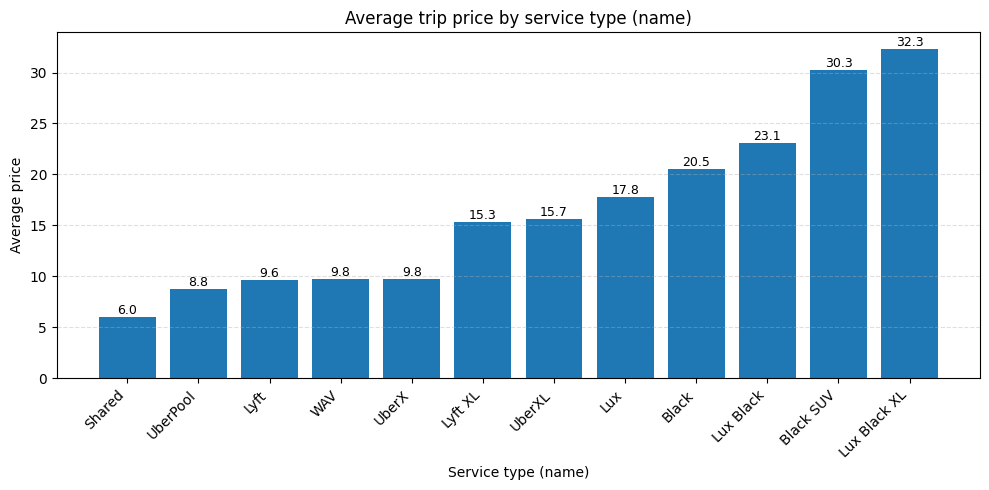

In [54]:
df_plot = df.dropna(subset=['price', 'name']).copy()

mean_price_by_name = (
    df_plot
    .groupby('name')['price']
    .mean()
    .sort_values()
)

print(mean_price_by_name)

plt.figure(figsize=(10, 5))
bars = plt.bar(mean_price_by_name.index, mean_price_by_name.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0
    )

plt.xlabel('Service type (name)')
plt.ylabel('Average price')
plt.title('Average trip price by service type (name)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


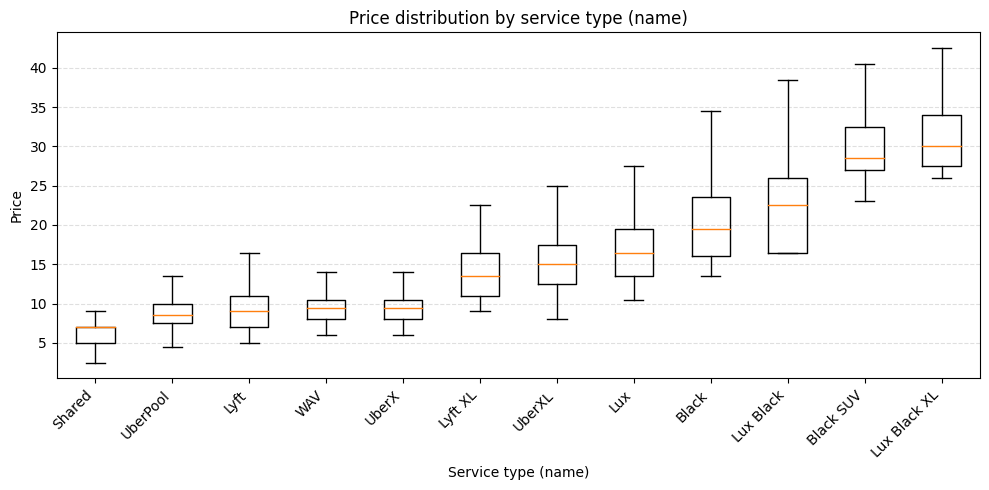

In [55]:
order = mean_price_by_name.index

data = [df_plot[df_plot['name'] == n]['price'].values for n in order]

plt.figure(figsize=(10, 5))
plt.boxplot(data, labels=order, showfliers=False) 

plt.xlabel('Service type (name)')
plt.ylabel('Price')
plt.title('Price distribution by service type (name)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

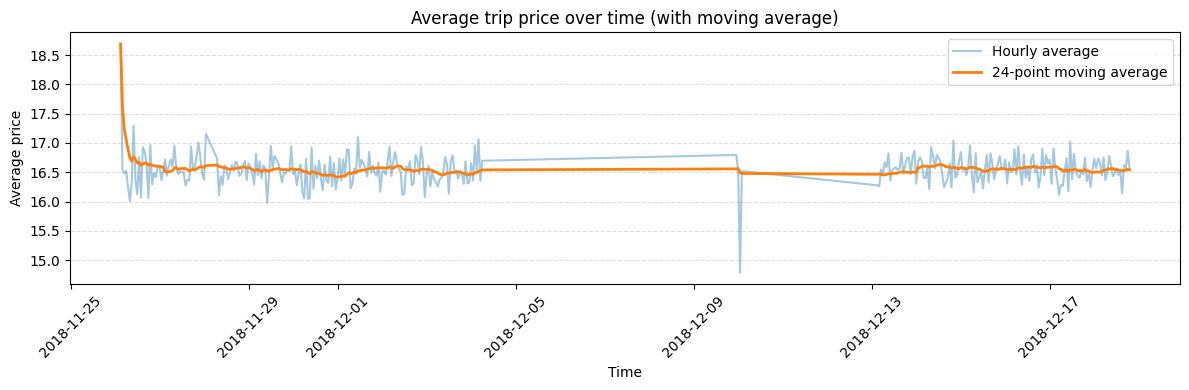

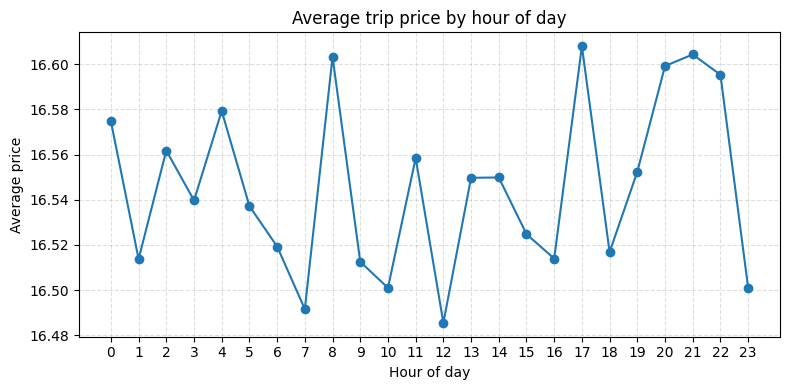

In [56]:
df_time = df.dropna(subset=['price']).copy()

df_time['datetime'] = pd.to_datetime({
    'year': 2018,
    'month': df_time['month'].astype(int),
    'day': df_time['day'].astype(int),
    'hour': df_time['hour'].astype(int)
})

df_time = df_time.sort_values('datetime')

price_time = (
    df_time
    .groupby('datetime')['price']
    .mean()
    .reset_index()
)


plt.figure(figsize=(12, 4))

plt.plot(price_time['datetime'], price_time['price'], alpha=0.4, label='Hourly average')

price_time['price_ma24'] = price_time['price'].rolling(window=24, min_periods=1).mean()
plt.plot(price_time['datetime'], price_time['price_ma24'], linewidth=2, label='24-point moving average')

plt.xlabel('Time')
plt.ylabel('Average price')
plt.title('Average trip price over time (with moving average)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


avg_price_by_hour = (
    df_time
    .groupby('hour')['price']
    .mean()
    .reset_index()
    .sort_values('hour')
)

plt.figure(figsize=(8, 4))
plt.plot(avg_price_by_hour['hour'], avg_price_by_hour['price'], marker='o')

plt.xlabel('Hour of day')
plt.ylabel('Average price')
plt.title('Average trip price by hour of day')
plt.xticks(range(0, 24))
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


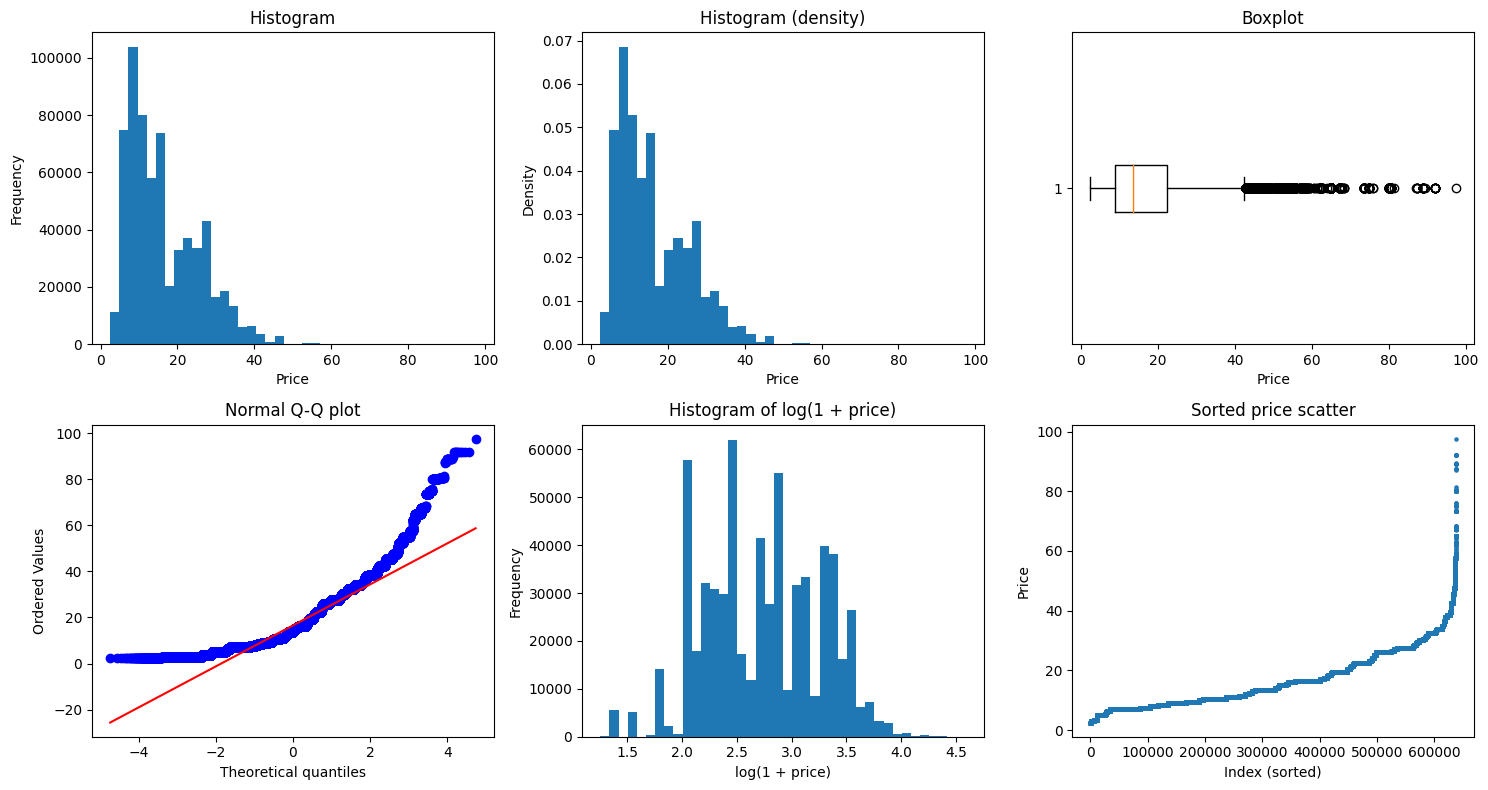

In [57]:
price = df['price'].dropna()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].hist(price, bins=40)
axes[0, 0].set_title('Histogram')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(price, bins=40, density=True)
axes[0, 1].set_title('Histogram (density)')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Density')

axes[0, 2].boxplot(price, vert=False, showfliers=True)
axes[0, 2].set_title('Boxplot')
axes[0, 2].set_xlabel('Price')

stats.probplot(price, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q plot')

log_price = np.log1p(price)
axes[1, 1].hist(log_price, bins=40)
axes[1, 1].set_title('Histogram of log(1 + price)')
axes[1, 1].set_xlabel('log(1 + price)')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].scatter(range(len(price)), np.sort(price.values), s=5)
axes[1, 2].set_title('Sorted price scatter')
axes[1, 2].set_xlabel('Index (sorted)')
axes[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [58]:
df_price = df_clean.copy()

price = df_price['price'].values

price_boxcox, lambda_opt = boxcox(price)

print(f"Optimal lambda for Box-Cox: {lambda_opt:.4f}")

df_clean['price_boxcox'] = price_boxcox


Optimal lambda for Box-Cox: 0.0744


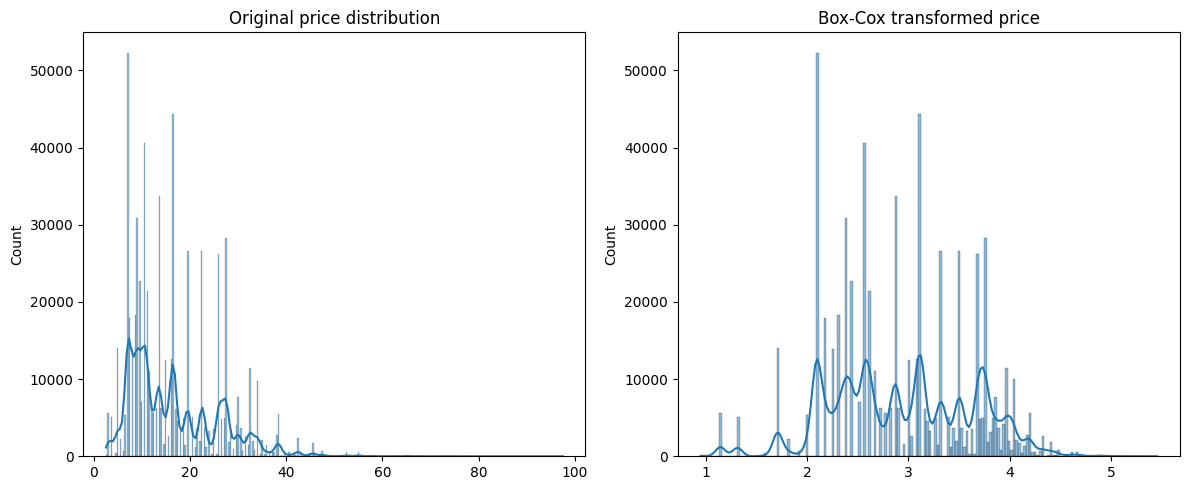

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(price, kde=True, ax=ax[0])
ax[0].set_title("Original price distribution")

sns.histplot(price_boxcox, kde=True, ax=ax[1])
ax[1].set_title("Box-Cox transformed price")

plt.tight_layout()
plt.show()


C:\Users\UOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


=== Shapiro-Wilk Test ===
Original price: W=0.9130, p-value=0.0000e+00
BoxCox price:   W=0.9808, p-value=0.0000e+00

Interpretation: p-value < 0.05 → non-normal distribution

=== D'Agostino K² Test ===
Original price: K2=96869.3448, p-value=0.0000e+00
BoxCox price:   K2=21812.0099, p-value=0.0000e+00

Interpretation: p-value < 0.05 → non-normal distribution


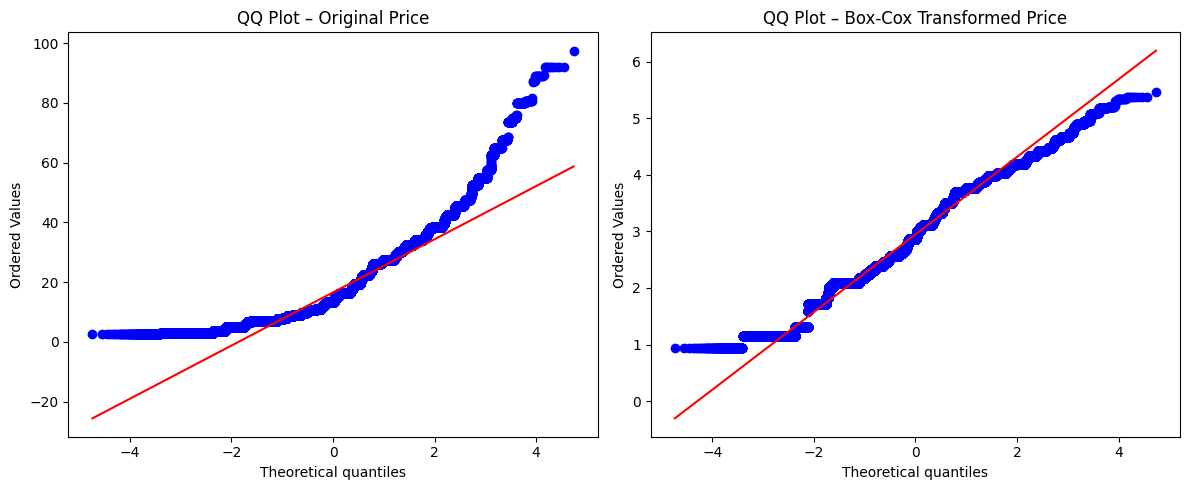

In [60]:
# ------------------ Shapiro–Wilk test ------------------
stat_shapiro_original, p_shapiro_original = shapiro(df_clean['price'])
stat_shapiro_boxcox,   p_shapiro_boxcox   = shapiro(df_clean['price_boxcox'])

print("=== Shapiro-Wilk Test ===")
print(f"Original price: W={stat_shapiro_original:.4f}, p-value={p_shapiro_original:.4e}")
print(f"BoxCox price:   W={stat_shapiro_boxcox:.4f}, p-value={p_shapiro_boxcox:.4e}")
print("\nInterpretation: p-value < 0.05 → non-normal distribution")


# ------------------ D'Agostino's K^2 Test ------------------
stat_dag_original, p_dag_original = normaltest(df_clean['price'])
stat_dag_boxcox,   p_dag_boxcox   = normaltest(df_clean['price_boxcox'])

print("\n=== D'Agostino K² Test ===")
print(f"Original price: K2={stat_dag_original:.4f}, p-value={p_dag_original:.4e}")
print(f"BoxCox price:   K2={stat_dag_boxcox:.4f}, p-value={p_dag_boxcox:.4e}")
print("\nInterpretation: p-value < 0.05 → non-normal distribution")


# ------------------ QQ Plots ------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

probplot(df_clean['price'], dist="norm", plot=ax[0])
ax[0].set_title("QQ Plot – Original Price")

probplot(df_clean['price_boxcox'], dist="norm", plot=ax[1])
ax[1].set_title("QQ Plot – Box-Cox Transformed Price")

plt.tight_layout()
plt.show()


In [61]:
price = df['price'].dropna()

sh_stat, sh_p = shapiro(price)
print("Shapiro–Wilk test")
print(f"Statistic: {sh_stat:.4f}, p-value: {sh_p:.4g}\n")

dp_stat, dp_p = normaltest(price)
print("D'Agostino–Pearson normality test")
print(f"Statistic: {dp_stat:.4f}, p-value: {dp_p:.4g}")

alpha = 0.05
print("\nInterpretation (alpha = 0.05):")
print("Shapiro–Wilk: ", "Reject H0 (not normal)" if sh_p < alpha else "Fail to reject H0 (approximately normal)")
print("D'Agostino–Pearson: ", "Reject H0 (not normal)" if dp_p < alpha else "Fail to reject H0 (approximately normal)")


Shapiro–Wilk test
Statistic: 0.9130, p-value: 0

D'Agostino–Pearson normality test
Statistic: 96869.3448, p-value: 0

Interpretation (alpha = 0.05):
Shapiro–Wilk:  Reject H0 (not normal)
D'Agostino–Pearson:  Reject H0 (not normal)


In [62]:
df_clean_trim = df_clean.copy()

Q1 = df_clean_trim['price'].quantile(0.25)
Q3 = df_clean_trim['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"Lower bound = {lower_bound:.2f}")
print(f"Upper bound = {upper_bound:.2f}")

before = len(df_clean_trim)

df_clean_trim = df_clean_trim[
    (df_clean_trim['price'] >= lower_bound) &
    (df_clean_trim['price'] <= upper_bound)
]

after = len(df_clean_trim)

print(f"Removed {before - after} outliers using IQR method.")
df_clean = df_clean_trim.copy()

Q1 = 9.00, Q3 = 22.50, IQR = 13.50
Lower bound = -11.25
Upper bound = 42.75
Removed 5589 outliers using IQR method.


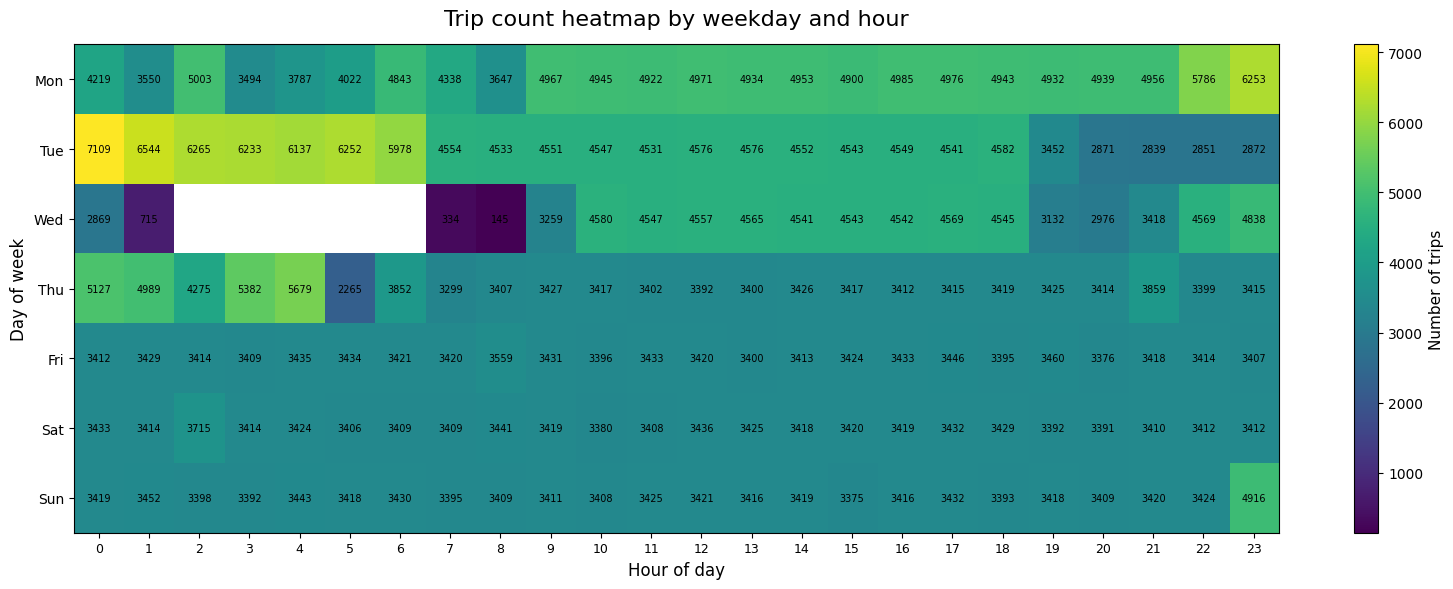

In [63]:
df_heat = df_clean.copy()

df_heat['datetime'] = pd.to_datetime({
    'year': 2018,
    'month': df_heat['month'].astype(int),
    'day': df_heat['day'].astype(int),
    'hour': df_heat['hour'].astype(int),
})

df_heat['weekday'] = df_heat['datetime'].dt.dayofweek
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
               4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_heat['weekday_name'] = df_heat['weekday'].map(weekday_map)

heat_data = (
    df_heat
    .groupby(['weekday_name', 'hour'])
    .size()
    .reset_index(name='trip_count')
)

heat_pivot = heat_data.pivot(index='weekday_name', columns='hour', values='trip_count')

row_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
col_order = list(range(24))
heat_pivot = heat_pivot.reindex(row_order).reindex(columns=col_order)

fig, ax = plt.subplots(figsize=(16, 6))

im = ax.imshow(heat_pivot.values, aspect='auto')

ax.set_xticks(np.arange(len(col_order)))
ax.set_yticks(np.arange(len(row_order)))
ax.set_xticklabels(col_order, fontsize=9)
ax.set_yticklabels(row_order, fontsize=10)

ax.set_xlabel('Hour of day', fontsize=12)
ax.set_ylabel('Day of week', fontsize=12)
ax.set_title('Trip count heatmap by weekday and hour', fontsize=16, pad=14)

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Number of trips', rotation=90, fontsize=11)

for i in range(len(row_order)):
    for j in range(len(col_order)):
        val = heat_pivot.iloc[i, j]
        if not np.isnan(val):
            ax.text(
                j, i,
                str(int(val)),
                ha='center',
                va='center',
                fontsize=7
            )

ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [64]:
df_peak = df_clean.copy()

df_peak['datetime'] = pd.to_datetime({
    'year': 2018,
    'month': df_peak['month'].astype(int),
    'day': df_peak['day'].astype(int),
    'hour': df_peak['hour'].astype(int),
})

df_peak['weekday'] = df_peak['datetime'].dt.dayofweek
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
               4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_peak['weekday_name'] = df_peak['weekday'].map(weekday_map)

trips_by_hour = (
    df_peak
    .groupby('hour')
    .size()
    .reset_index(name='trip_count')
)

peak_hour_row = trips_by_hour.loc[trips_by_hour['trip_count'].idxmax()]
off_hour_row  = trips_by_hour.loc[trips_by_hour['trip_count'].idxmin()]

print("== Hour-level peaks ==")
print(f"Peak hour (most trips): {int(peak_hour_row['hour'])}h "
      f"with {int(peak_hour_row['trip_count'])} trips")
print(f"Off-peak hour (fewest trips): {int(off_hour_row['hour'])}h "
      f"with {int(off_hour_row['trip_count'])} trips\n")

trips_by_day = (
    df_peak
    .groupby('weekday_name')
    .size()
    .reset_index(name='trip_count')
)

peak_day_row = trips_by_day.loc[trips_by_day['trip_count'].idxmax()]
off_day_row  = trips_by_day.loc[trips_by_day['trip_count'].idxmin()]

print("== Day-level peaks ==")
print(f"Peak day (most trips): {peak_day_row['weekday_name']} "
      f"with {int(peak_day_row['trip_count'])} trips")
print(f"Off-peak day (fewest trips): {off_day_row['weekday_name']} "
      f"with {int(off_day_row['trip_count'])} trips\n")

heat_data = (
    df_peak
    .groupby(['weekday_name', 'hour'])
    .size()
    .reset_index(name='trip_count')
)

peak_combo_row = heat_data.loc[heat_data['trip_count'].idxmax()]
off_combo_row  = heat_data.loc[heat_data['trip_count'].idxmin()]

print("== Day–Hour combination peaks ==")
print(f"Peak combination: {peak_combo_row['weekday_name']} at "
      f"{int(peak_combo_row['hour'])}h "
      f"with {int(peak_combo_row['trip_count'])} trips")

print(f"Off-peak combination: {off_combo_row['weekday_name']} at "
      f"{int(off_combo_row['hour'])}h "
      f"with {int(off_combo_row['trip_count'])} trips")

== Hour-level peaks ==
Peak hour (most trips): 0h with 29588 trips
Off-peak hour (fewest trips): 8h with 22141 trips

== Day-level peaks ==
Peak day (most trips): Tue with 114038 trips
Off-peak day (fewest trips): Wed with 67244 trips

== Day–Hour combination peaks ==
Peak combination: Tue at 0h with 7109 trips
Off-peak combination: Wed at 8h with 145 trips


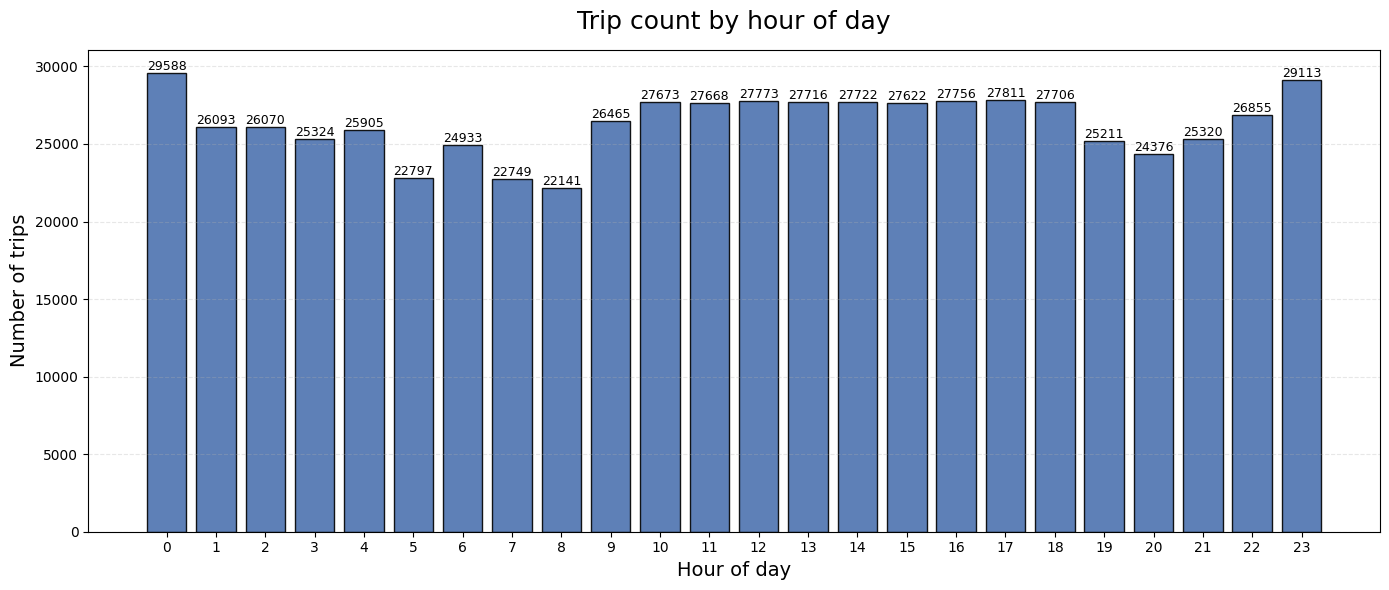

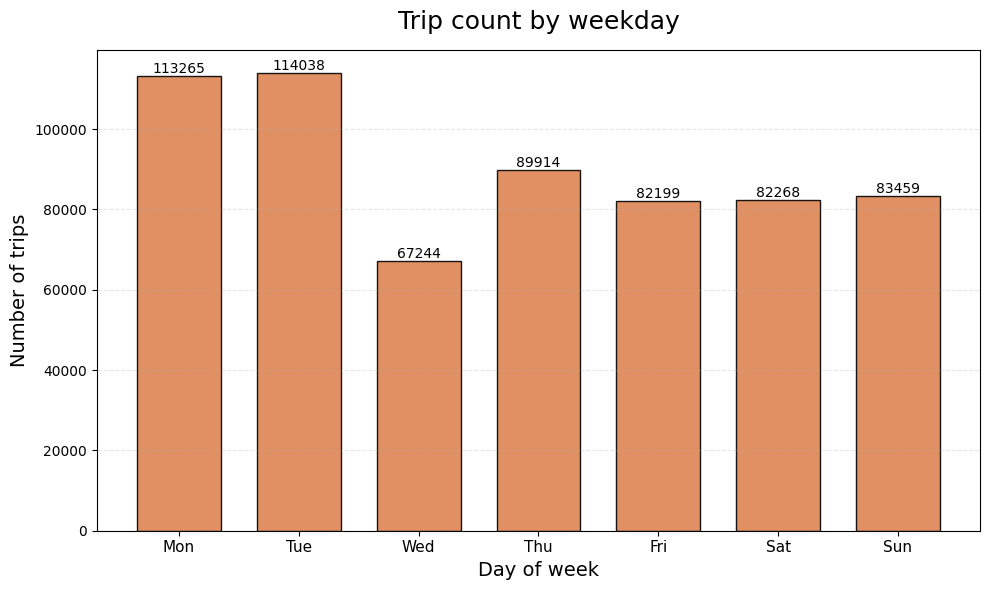

In [65]:
df_hist = df_clean.copy()

df_hist['datetime'] = pd.to_datetime({
    'year': 2018,
    'month': df_hist['month'].astype(int),
    'day': df_hist['day'].astype(int),
    'hour': df_hist['hour'].astype(int),
})

df_hist['weekday'] = df_hist['datetime'].dt.dayofweek
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
               4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_hist['weekday_name'] = df_hist['weekday'].map(weekday_map)

trips_by_hour = (
    df_hist
    .groupby('hour')
    .size()
    .reindex(range(24), fill_value=0)
)

trips_by_day = (
    df_hist
    .groupby('weekday_name')
    .size()
    .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)

plt.figure(figsize=(14, 6))

bars = plt.bar(trips_by_hour.index, trips_by_hour.values,
               width=0.8, color='#4C72B0', edgecolor='black', alpha=0.9)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{int(height)}',
             ha='center', va='bottom',
             fontsize=9)

plt.title('Trip count by hour of day', fontsize=18, pad=15)
plt.xlabel('Hour of day', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.xticks(range(0, 24, 1), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

bars = plt.bar(trips_by_day.index, trips_by_day.values,
               width=0.7, color='#DD8452', edgecolor='black', alpha=0.9)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{int(height)}',
             ha='center', va='bottom',
             fontsize=10)

plt.title('Trip count by weekday', fontsize=18, pad=15)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [66]:
for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        df_clean[col] = df_clean[col].astype(int)

In [67]:
cols_to_drop = [
    'id', 'product_id',
    'latitude', 'longitude',
    'short_summary', 'long_summary',
    'temperatureHigh', 'temperatureLow',
    'apparentTemperatureHigh', 'apparentTemperatureLow',
    'temperatureMin', 'temperatureMax',
    'apparentTemperatureMin', 'apparentTemperatureMax'
]

df_corr = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])

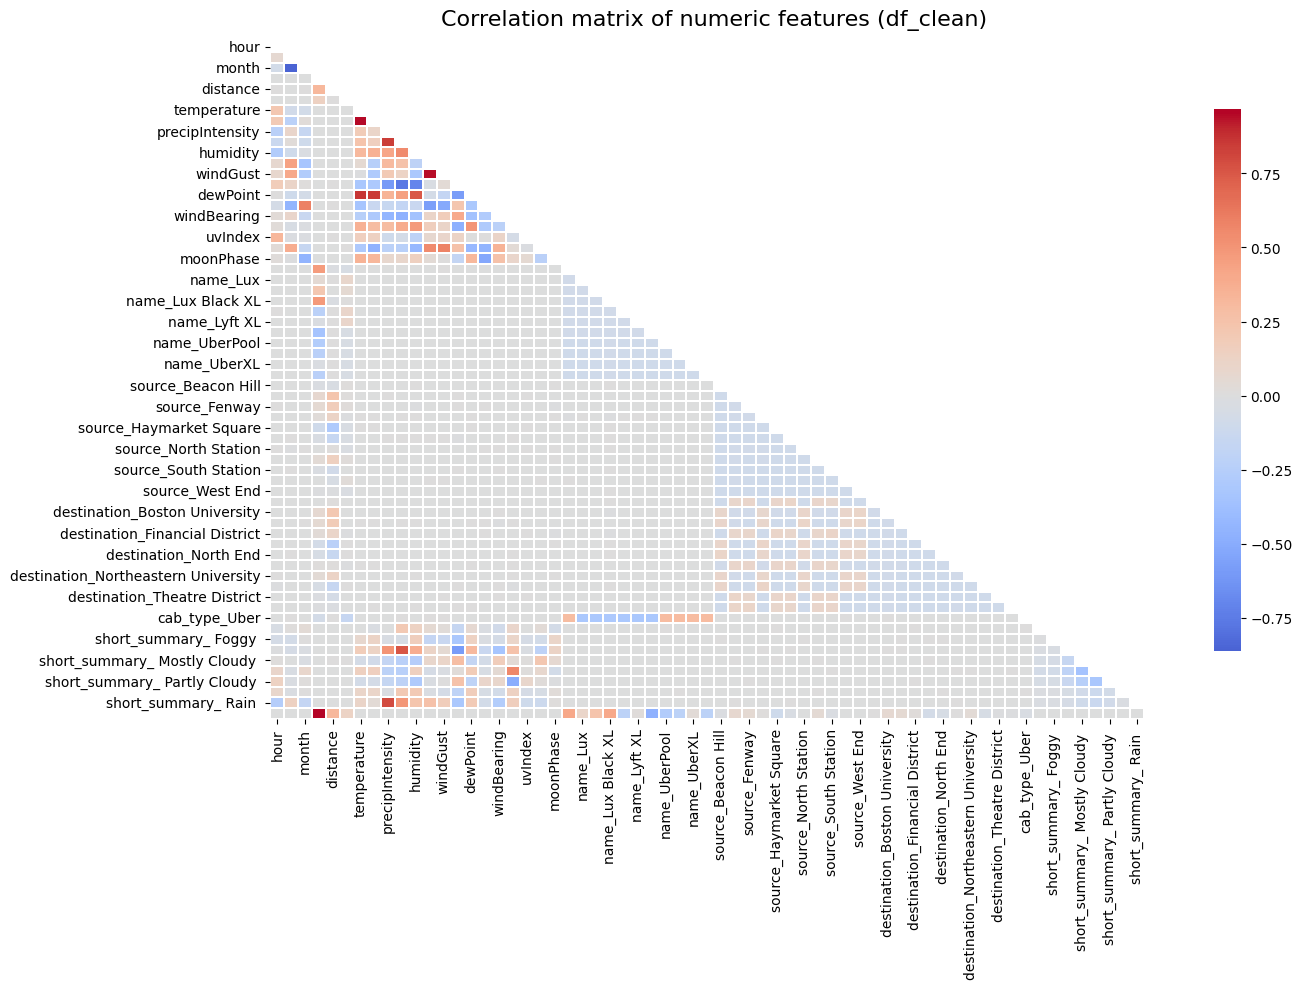

In [68]:
num_cols = df_corr.select_dtypes(include=['number']).columns

corr = df_corr[num_cols].corr()

plt.figure(figsize=(14, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    linewidths=0.3,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation matrix of numeric features (df_clean)', fontsize=16, pad=12)
plt.tight_layout()
plt.show()

Correlation of each numeric feature with price:

price                                  1.000000
price_boxcox                           0.965819
name_Lux Black XL                      0.480185
name_Black SUV                         0.473115
distance                               0.318671
name_Lux Black                         0.218474
surge_multiplier                       0.141238
source_Boston University               0.070825
destination_Boston University          0.062635
source_Fenway                          0.057131
destination_Fenway                     0.053400
name_Lux                               0.049211
source_Northeastern University         0.044033
destination_Northeastern University    0.042309
destination_Financial District         0.035597
source_Financial District              0.030102
destination_North Station              0.010183
source_North Station                   0.002096
short_summary_ Mostly Cloudy           0.001863
month                                  

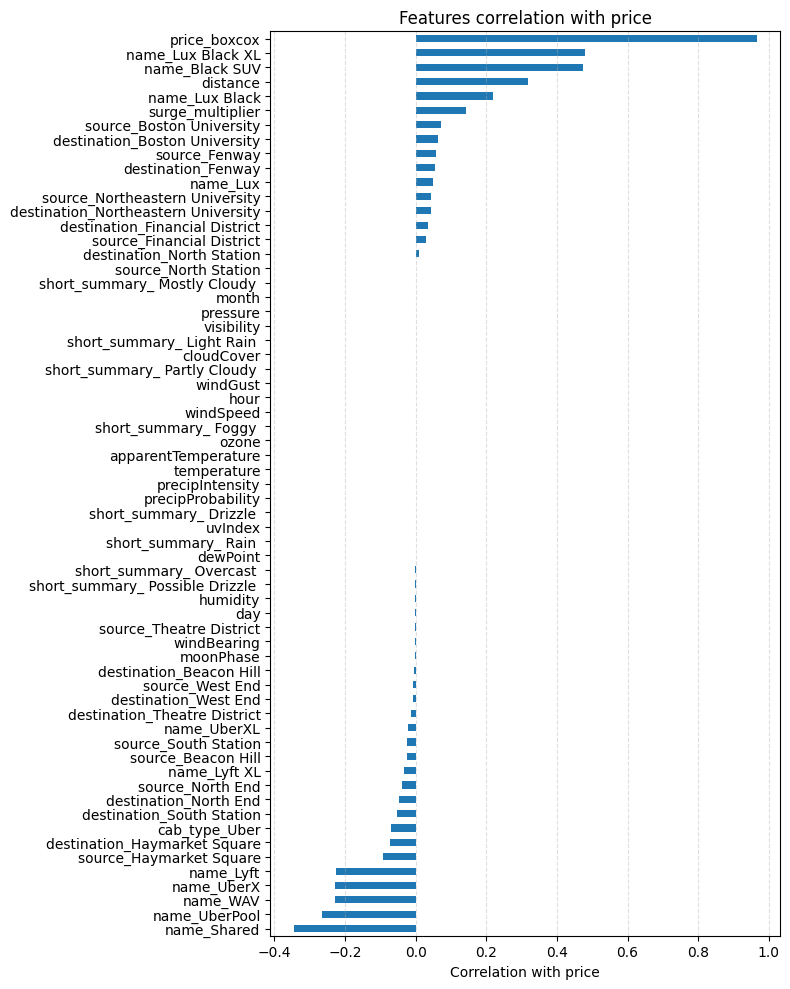

In [69]:
corr_with_price = corr['price'].sort_values(ascending=False)
print("Correlation of each numeric feature with price:\n")
print(corr_with_price)

plt.figure(figsize=(8, 10))
corr_with_price.drop('price').sort_values().plot(kind='barh')
plt.xlabel('Correlation with price')
plt.title('Features correlation with price')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [70]:
df_corr2 = df_corr.drop(columns=[col for col in df_corr.columns 
                                 if col.startswith("source_") or col.startswith("destination_")])

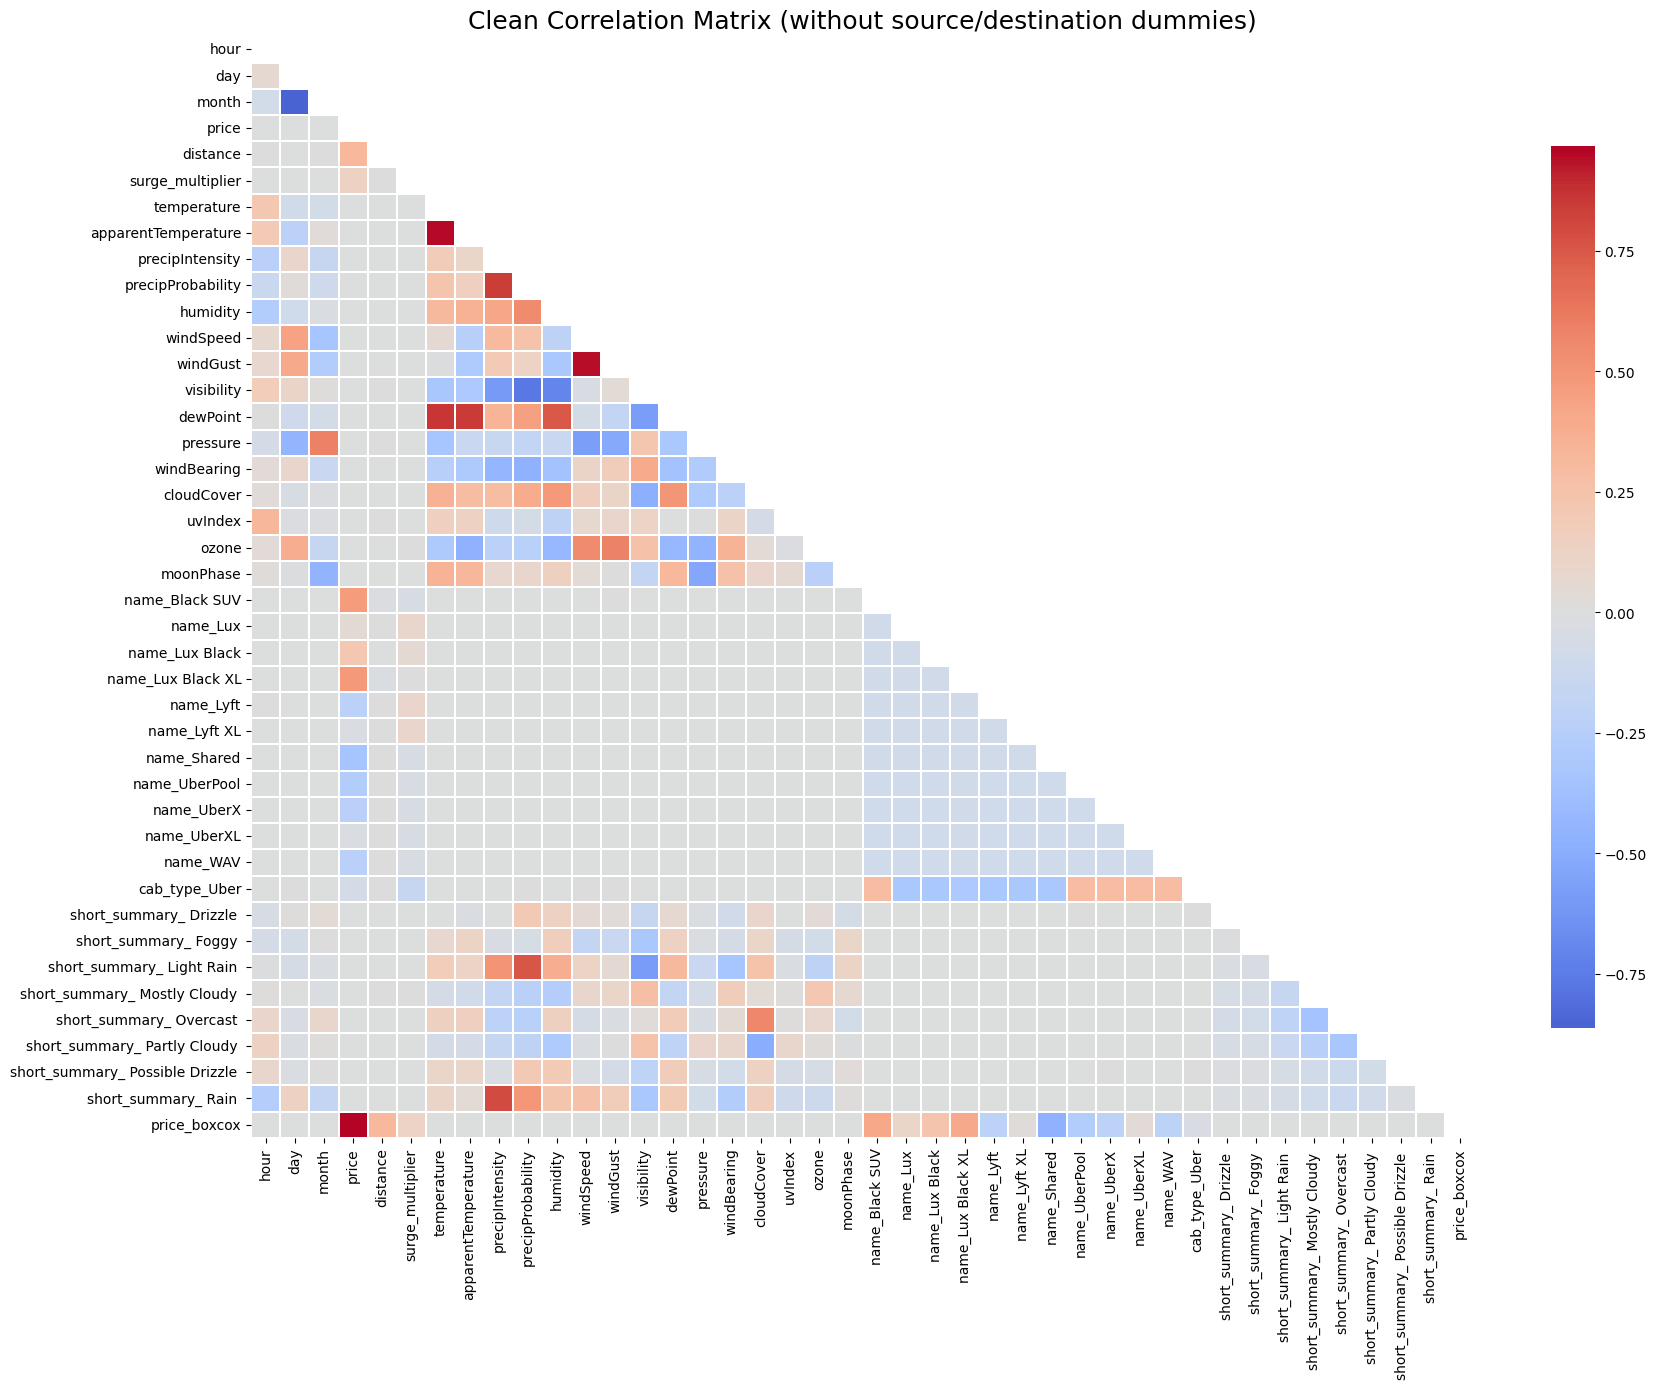

In [71]:
num_cols = df_corr2.select_dtypes(include=[np.number]).columns

corr2 = df_corr2[num_cols].corr()

plt.figure(figsize=(18, 14))

mask = np.triu(np.ones_like(corr2, dtype=bool))

sns.heatmap(
    corr2,
    mask=mask,
    cmap='coolwarm',
    center=0,
    linewidths=0.3,
    cbar_kws={'shrink': 0.8}
)

plt.title('Clean Correlation Matrix (without source/destination dummies)', fontsize=18)
plt.tight_layout()
plt.show()

In [72]:
df_clean['datetime'] = pd.to_datetime({
    'year': 2018,
    'month': df_clean['month'].astype(int),
    'day': df_clean['day'].astype(int),
    'hour': df_clean['hour'].astype(int),
})

df_clean['weekday'] = df_clean['datetime'].dt.dayofweek

weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
               4: 'Fri', 5: 'Sat', 6: 'Sun'}

df_clean['weekday_name'] = df_clean['weekday'].map(weekday_map)


weekday_dummies = pd.get_dummies(df_clean['weekday_name'], prefix='weekday', drop_first=True)

df_clean = pd.concat([df_clean, weekday_dummies], axis=1)

df_clean = df_clean.drop(columns=['weekday', 'weekday_name'])

Selected features: ['distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_WAV', 'price_boxcox']


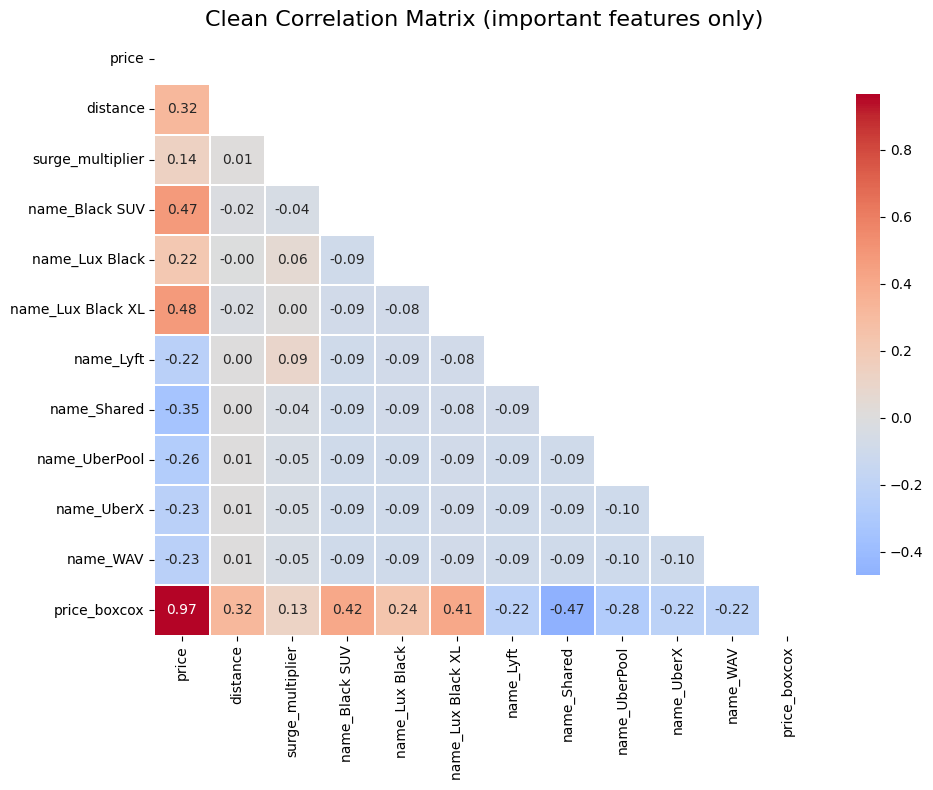

In [73]:
df_corr_final = df_clean.drop(columns=[
    col for col in df_clean.columns
    if col.startswith("source_") or col.startswith("destination_")
])

num_cols = df_corr_final.select_dtypes(include=[np.number]).columns

corr_price = df_corr_final[num_cols].corr()['price']

important_features = corr_price[abs(corr_price) >= 0.1].index.tolist()

important_features = [col for col in important_features if col != 'price']

print("Selected features:", important_features)

corr_final = df_corr_final[['price'] + important_features].corr()

plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_final, dtype=bool))

sns.heatmap(
    corr_final,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    center=0,
    linewidths=0.3,
    cbar_kws={'shrink': 0.8}
)

plt.title("Clean Correlation Matrix (important features only)", fontsize=16)
plt.tight_layout()
plt.show()


Explained variance ratio for each component:
PC1: 0.3435
PC2: 0.2214
PC3: 0.1425
PC4: 0.0790
PC5: 0.0703
PC6: 0.0511
PC7: 0.0320
PC8: 0.0237
PC9: 0.0182
PC10: 0.0088
PC11: 0.0056
PC12: 0.0035
PC13: 0.0005
PC14: 0.0001


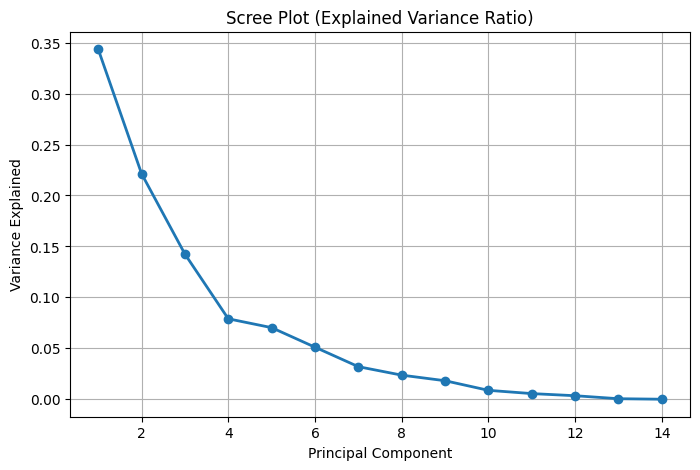


Added PC1_weather and PC2_weather to df_clean.


,PC1_weather,PC2_weather,PC3_weather
0,0.587105,-0.231518,0.039462
1,-4.225201,2.507723,-2.751215
2,0.844936,0.270939,0.640172
3,1.423055,-1.133837,-0.271045
4,1.224752,1.287369,0.538400


In [74]:
weather_cols = [
    'temperature', 'apparentTemperature',
    'humidity', 'windSpeed', 'windGust',
    'precipIntensity', 'precipProbability', 
    'visibility', 'dewPoint', 'pressure',
    'cloudCover', 'uvIndex', 'ozone', 'moonPhase'
]

weather_data = df_clean[weather_cols].copy()

scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_data)

pca = PCA()
pca.fit(weather_scaled)

explained_var = pca.explained_variance_ratio_

print("Explained variance ratio for each component:")
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_var)+1), explained_var, 'o-', linewidth=2)
plt.title('Scree Plot (Explained Variance Ratio)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

pca_final = PCA(n_components=3)
weather_pca = pca_final.fit_transform(weather_scaled)

df_clean['PC1_weather'] = weather_pca[:, 0]
df_clean['PC2_weather'] = weather_pca[:, 1]
df_clean['PC3_weather'] = weather_pca[:, 2]

print("\nAdded PC1_weather and PC2_weather to df_clean.")
df_clean[['PC1_weather', 'PC2_weather','PC3_weather']].head()

In [75]:
df_clean['rain'] = (df_clean['precipIntensity'] > 0).astype(int)

weather_features = [
    'temperature', 'apparentTemperature', 'humidity',
    'windSpeed', 'windGust', 'visibility',
    'dewPoint', 'pressure', 'cloudCover', 'uvIndex',
    'ozone', 'moonPhase'
]

X = df_clean[weather_features].copy()
y = df_clean['rain']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train)


y_pred = log_model.predict(X_test_scaled)

print("📌 Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


📌 Logistic Regression Performance
Accuracy: 0.9138585366625026

Confusion Matrix:
 [[93130  5837]
 [ 5058 22453]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     98967
           1       0.79      0.82      0.80     27511

    accuracy                           0.91    126478
   macro avg       0.87      0.88      0.87    126478
weighted avg       0.91      0.91      0.91    126478



📌 Random Forest + PCA Performance
Accuracy: 1.0

Confusion Matrix:
 [[98967     0]
 [    0 27511]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     98967
           1       1.00      1.00      1.00     27511

    accuracy                           1.00    126478
   macro avg       1.00      1.00      1.00    126478
weighted avg       1.00      1.00      1.00    126478



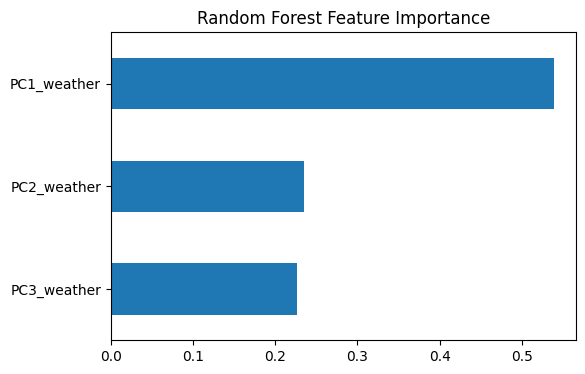

In [76]:
y = df_clean['rain']

X = df_clean[['PC1_weather', 'PC2_weather', 'PC3_weather']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("📌 Random Forest + PCA Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

feat_imp = pd.Series(rf_model.feature_importances_, index=['PC1_weather','PC2_weather','PC3_weather'])
feat_imp.sort_values().plot(kind='barh', figsize=(6,4), title="Random Forest Feature Importance")
plt.show()


In [77]:
numeric_df = df_clean.select_dtypes(include=[np.number])

corr = numeric_df.corr()['price']

important_candidates = corr[abs(corr) >= 0.10].index.tolist()
important_candidates = [f for f in important_candidates if f != 'price']

print("Candidate features based on correlation:", important_candidates)

best_r2 = -999
best_features = None

X_full = df_clean[important_candidates]
y = df_clean["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

for r in range(1, len(important_candidates) + 1):
    for combo in itertools.combinations(important_candidates, r):
        combo = list(combo)
        
        model = LinearRegression()
        model.fit(X_train[combo], y_train)
        
        y_pred = model.predict(X_test[combo])
        r2 = r2_score(y_test, y_pred)
        
        if r2 > best_r2:
            best_r2 = r2
            best_features = combo

print("🔥 Best Feature Subset:", best_features)
print("⭐ Best R²:", best_r2)


Candidate features based on correlation: ['distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_WAV', 'price_boxcox']
🔥 Best Feature Subset: ['distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_WAV', 'price_boxcox']
⭐ Best R²: 0.9668338375263086


In [78]:
y = df_clean['price']

X = df_clean.drop(columns=[
    'price',        
    'id',           
    'product_id',
    'rain',
], errors='ignore')


X = X[[col for col in X.columns if not col.startswith('source_') and not col.startswith('destination_')]]

X_numeric = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

print("Best alpha (λ):", lasso.alpha_)

coefficients = pd.Series(lasso.coef_, index=X_numeric.columns)

coefficients_df = pd.DataFrame({
    'feature': X_numeric.columns,
    'coefficient': lasso.coef_
}).sort_values(by='coefficient', ascending=False)

coefficients_df

Best alpha (λ): 0.008470359936213154


,feature,coefficient
50,price_boxcox,6.810413
33,name_Lux Black XL,1.346670
30,name_Black SUV,1.244823
3,distance,0.666712
4,surge_multiplier,0.414703
32,name_Lux Black,0.244502
36,name_Shared,0.179521
0,hour,-0.000000
42,short_summary_ Drizzle,0.000000
1,day,-0.000000


In [79]:
X_numeric = X.select_dtypes(include=[np.number])
y_numeric = y  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


num_features_to_select = 10

lr_model = LinearRegression()

rfe = RFE(
    estimator=lr_model,
    n_features_to_select=num_features_to_select
)

rfe.fit(X_scaled, y_numeric)


selected_features_rfe = X_numeric.columns[rfe.support_].tolist()

print("\nSelected Features by RFE:")
for f in selected_features_rfe:
    print(" -", f)

coef_df = pd.DataFrame({
    'feature': X_numeric.columns,
    'selected_by_RFE': rfe.support_,
    'ranking': rfe.ranking_
}).sort_values(by='ranking')

coef_df


Selected Features by RFE:
 - pressure
 - moonPhase
 - name_Lux
 - name_Lux Black
 - name_Lux Black XL
 - name_Lyft
 - name_Lyft XL
 - name_Shared
 - cab_type_Uber
 - PC2_weather


,feature,selected_by_RFE,ranking
32,name_Lux Black,True,1
25,moonPhase,True,1
52,PC2_weather,True,1
31,name_Lux,True,1
33,name_Lux Black XL,True,1
20,pressure,True,1
34,name_Lyft,True,1
35,name_Lyft XL,True,1
36,name_Shared,True,1
41,cab_type_Uber,True,1


In [80]:
y = df_clean['price']

corr_features = [
    'distance', 'surge_multiplier',
    'name_Black SUV', 'name_Lux Black', 'name_Lux Black XL',
    'name_Lyft', 'name_Shared', 'name_UberPool', 
    'name_UberX', 'name_WAV'
]

X1 = df_clean[corr_features]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_pred = model1.predict(X1_test)

mae1 = mean_absolute_error(y1_test, y1_pred)
rmse1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2_1 = r2_score(y1_test, y1_pred)


lasso_features = [
    'distance', 'surge_multiplier', 'cab_type_Uber',
    'name_Lux Black', 'name_Lux Black XL', 'name_Black SUV',
    'name_Lyft XL', 'name_UberXL', 'name_Lyft',
    'name_WAV', 'name_UberX', 'name_Shared', 'name_UberPool'
]

X2 = df_clean[lasso_features]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

mae2 = mean_absolute_error(y2_test, y2_pred)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_2 = r2_score(y2_test, y2_pred)


rfe_features = [
    'distance', 'name_Black SUV', 'name_Lux Black', 'name_Lux Black XL',
    'name_Lyft', 'name_Shared', 'name_UberPool',
    'name_UberX', 'name_WAV', 'cab_type_Uber'
]

X3 = df_clean[rfe_features]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

y3_pred = model3.predict(X3_test)

mae3 = mean_absolute_error(y3_test, y3_pred)
rmse3 = np.sqrt(mean_squared_error(y3_test, y3_pred))
r2_3 = r2_score(y3_test, y3_pred)


print("\n🌟 Final Model Comparison (Correlation vs LASSO vs RFE)")
print("==============================================================")

print("\nModel 1 — Correlation Features")
print("MAE :", mae1)
print("RMSE:", rmse1)
print("R²  :", r2_1)

print("\nModel 2 — LASSO Features")
print("MAE :", mae2)
print("RMSE:", rmse2)
print("R²  :", r2_2)

print("\nModel 3 — RFE Features")
print("MAE :", mae3)
print("RMSE:", rmse3)
print("R²  :", r2_3)

print("\n⭐ Best Model Based on R² + RMSE + MAE:")
best_r2 = max(r2_1, r2_2, r2_3)
if best_r2 == r2_1:
    print("→ Model 1 (Correlation-based) performs best.")
elif best_r2 == r2_2:
    print("→ Model 2 (LASSO-based) performs best.")
else:
    print("→ Model 3 (RFE-based) performs best.")



🌟 Final Model Comparison (Correlation vs LASSO vs RFE)

Model 1 — Correlation Features
MAE : 1.9733546947913003
RMSE: 2.5946992881650237
R²  : 0.912429725238297

Model 2 — LASSO Features
MAE : 1.6747262443774178
RMSE: 2.261964876126373
R²  : 0.9334490344487046

Model 3 — RFE Features
MAE : 2.0197468646688446
RMSE: 2.7575423690389003
R²  : 0.901092998690081

⭐ Best Model Based on R² + RMSE + MAE:
→ Model 2 (LASSO-based) performs best.


In [81]:
lasso_features = [
    'distance', 'surge_multiplier', 'cab_type_Uber',
    'name_Lux Black', 'name_Lux Black XL', 'name_Black SUV',
    'name_Lyft XL', 'name_UberXL', 'name_Lyft',
    'name_WAV', 'name_UberX', 'name_Shared', 'name_UberPool'
]

X = df_clean[lasso_features]
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

print("⭐ XGBoost Performance")
print("MAE :", mae_xgb)
print("RMSE:", rmse_xgb)
print("R²  :", r2_xgb)


⭐ XGBoost Performance
MAE : 1.1264449461419674
RMSE: 1.6649513090143273
R²  : 0.9639433211748457


In [82]:
lasso_features = [
    'distance', 'surge_multiplier', 'cab_type_Uber',
    'name_Lux Black', 'name_Lux Black XL', 'name_Black SUV',
    'name_Lyft XL', 'name_UberXL', 'name_Lyft',
    'name_WAV', 'name_UberX', 'name_Shared', 'name_UberPool'
]

X = df_clean[lasso_features]
y = df_clean['price']

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=300,     
    max_depth=None,       
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1             
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print("⭐ Random Forest Performance")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)

importances = rf_model.feature_importances_

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance


⭐ Random Forest Performance
MAE : 1.100823089122721
RMSE: 1.640783284141814
R²  : 0.9649825035891764


,feature,importance
5,name_Black SUV,0.275308
4,name_Lux Black XL,0.239783
0,distance,0.143044
3,name_Lux Black,0.100724
11,name_Shared,0.052171
8,name_Lyft,0.046044
9,name_WAV,0.038407
10,name_UberX,0.034151
12,name_UberPool,0.030561
1,surge_multiplier,0.018471


In [83]:
X = df_clean[lasso_features]
y = df_clean["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_small = X_train.sample(20000, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

In [84]:
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 1.0]
}

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_small, y_train_small)

print("🔥 GridSearch Best Params:")
print(grid_search.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
🔥 GridSearch Best Params:
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}


In [85]:
best_grid_model = XGBRegressor(
    **grid_search.best_params_,
    objective='reg:squarederror',
    random_state=42
)

best_grid_model.fit(X_train, y_train)
y_pred_grid = best_grid_model.predict(X_test)

rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print("\n⭐ GridSearch Performance on TEST:")
print("RMSE:", rmse_grid)
print("MAE :", mae_grid)
print("R²  :", r2_grid)


⭐ GridSearch Performance on TEST:
RMSE: 1.6699656989799958
MAE : 1.1329626729350046
R²  : 0.9637258078918708


In [86]:
Levels = [
    [200, 300, 500],   
    [4, 6, 8],         
    [0.05, 0.1, 0.2]   
]

param_combinations = list(itertools.product(*Levels))

taguchi_results_test = []

for params in param_combinations:
    n_est, depth, lr = params

    model = XGBRegressor(
        n_estimators=n_est,
        max_depth=depth,
        learning_rate=lr,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test  = mean_absolute_error(y_test, y_pred_test)
    r2_test   = r2_score(y_test, y_pred_test)

    taguchi_results_test.append((params, rmse_test, mae_test, r2_test))

best_taguchi_test = min(taguchi_results_test, key=lambda x: x[1])

print("\n🔥 Best Taguchi Parameters on TEST:")
print("Params:", best_taguchi_test[0])
print("RMSE :", best_taguchi_test[1])
print("MAE  :", best_taguchi_test[2])
print("R²   :", best_taguchi_test[3])


🔥 Best Taguchi Parameters on TEST:
Params: (500, 8, 0.1)
RMSE : 1.6545438406172452
MAE  : 1.115050755089036
R²   : 0.9643926867366751


In [87]:
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [8, 12, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train_small, y_train_small)

print("🔥 Best RF Parameters (Grid Search):")
print(grid_search_rf.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
🔥 Best RF Parameters (Grid Search):
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}


In [88]:
best_rf = RandomForestRegressor(
    **grid_search_rf.best_params_,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("\n⭐ Random Forest GridSearch Performance on TEST:")
print("RMSE:", rmse_rf)
print("MAE :", mae_rf)
print("R²  :", r2_rf)



⭐ Random Forest GridSearch Performance on TEST:
RMSE: 1.6378668708015844
MAE : 1.1001708038428168
R²  : 0.9651068767871295


In [89]:
levels_estimators = [200, 400, 600]
levels_depth      = [8, 12, 16]
levels_features   = ['sqrt', 'log2', None]

L9 = [
    (0, 0, 0),
    (0, 1, 1),
    (0, 2, 2),
    (1, 0, 1),
    (1, 1, 2),
    (1, 2, 0),
    (2, 0, 2),
    (2, 1, 0),
    (2, 2, 1),
]

results = []

for (i, j, k) in L9:
    n_est = levels_estimators[i]
    depth = levels_depth[j]
    feat  = levels_features[k]

    model = RandomForestRegressor(
        n_estimators=n_est,
        max_depth=depth,
        max_features=feat,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    results.append(((n_est, depth, feat), rmse, mae, r2))

best_row = min(results, key=lambda x: x[1])

print("🔥 Best Taguchi Parameters (L9) on TEST:")
print("Params:", best_row[0])
print("RMSE :", best_row[1])
print("MAE  :", best_row[2])
print("R²   :", best_row[3])

🔥 Best Taguchi Parameters (L9) on TEST:
Params: (600, 16, 'log2')
RMSE : 1.6416518562872764
MAE  : 1.110705807570559
R²   : 0.9649454197492237
